# Librerías

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy.stats import *

# libraries used to pre-process
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline
import pickle
from sklearn.base import BaseEstimator, TransformerMixin

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Lectura de archivos


In [2]:
df =pd.read_csv('/Users/perez/Downloads/train_p3.csv')
aux=df.copy()


In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,18125,220000,2,3,2,32,0,0,0,0,0,0,209259,192365,184198,171391,178742,164793,7000,15000,6000,10000,10000,7000,0
1,3983,220000,2,2,1,41,2,0,0,2,0,0,27094,27819,30363,29579,48933,97187,1465,3009,0,20000,50000,1240,0
2,19251,80000,2,1,2,27,-1,-1,-1,0,-1,-1,3199,1205,917,917,702,3099,1325,917,0,702,3099,0,0
3,4024,20000,2,2,2,38,1,2,2,4,3,2,10683,12729,14734,14190,13721,13848,2500,2501,0,0,441,1,0
4,20610,100000,2,1,2,28,0,0,0,0,0,0,102697,100462,101879,100999,101188,99328,4600,4000,4000,4000,4000,4400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,13019,110000,1,1,2,28,0,0,0,0,0,0,102282,104196,105922,108820,66883,68083,5200,5000,5000,2100,2000,2000,0
20996,27065,420000,2,2,2,25,-1,0,0,0,0,0,28206,122212,117835,112705,111357,108306,100000,4013,3822,4086,3800,3600,0
20997,5873,50000,1,2,1,34,0,0,0,0,0,0,48976,47404,46338,14234,19545,20173,2023,3105,3119,11000,909,3000,0
20998,21449,100000,2,1,2,27,-2,-2,-2,-2,-2,-2,-2000,5555,0,0,0,0,7555,0,0,0,0,0,0


In [4]:
#Renombramos por comodidad
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

In [5]:
#Verificamos nulos
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
#Verificamos duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
#Separamos columnas categoricas de numericas
numerical_features = []
categorical_features = []
df_w= df.copy()
df_w.drop(columns=['ID'], inplace=True)


for col in df_w.columns:  
  if df[col].nunique() > 15:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']


### EDA Y Gráficas

In [8]:
df[numerical_features].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167866.285714,35.502095,51301.897000,49211.558667,4.709062e+04,43443.812571,40481.231714,39041.153714,5651.380048,5.914739e+03,5306.849952,4760.828667,4788.356333,5239.212762
std,130184.881836,9.211036,73913.948932,71270.193763,6.972973e+04,64601.447362,61065.857316,60219.024686,16167.075741,2.248244e+04,18342.905254,15170.454479,15315.297340,17978.877017
min,10000.000000,21.000000,-15308.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3509.750000,2989.750000,2.599750e+03,2376.750000,1805.000000,1255.750000,1000.000000,8.320000e+02,390.000000,300.000000,241.000000,107.750000
50%,140000.000000,34.000000,22355.000000,21052.500000,2.007750e+04,18969.500000,18146.000000,16972.000000,2100.000000,2.007000e+03,1806.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67622.750000,64337.250000,6.003925e+04,54889.000000,50340.750000,49326.250000,5012.000000,5.000000e+03,4518.500000,4076.250000,4060.000000,4006.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


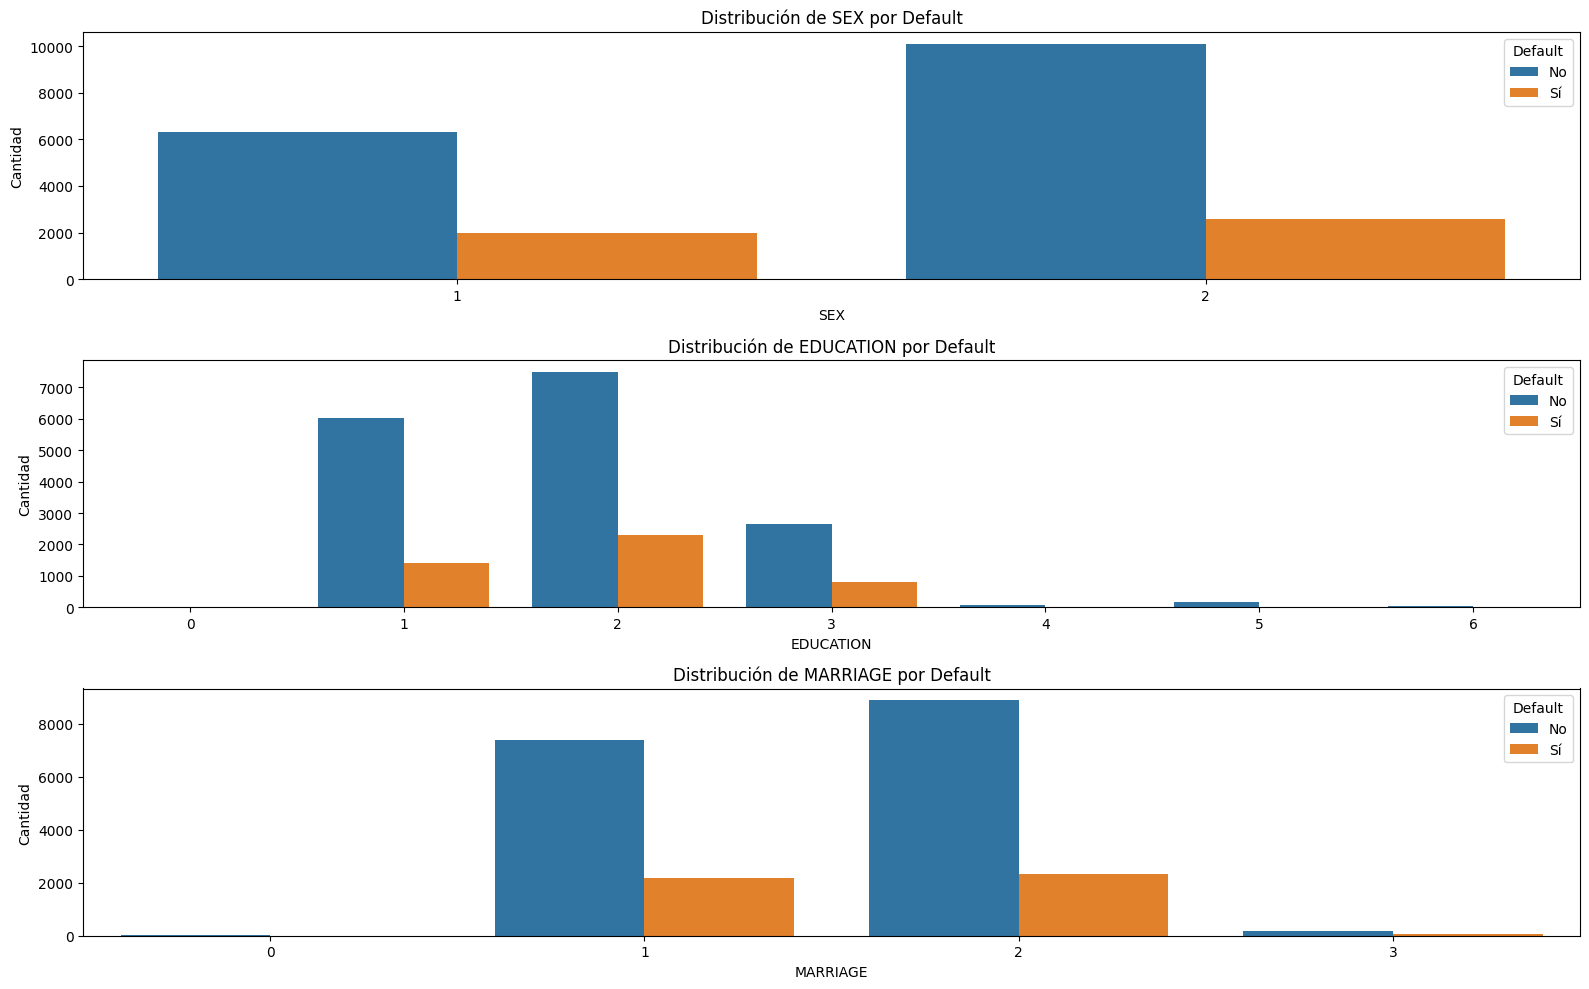

In [9]:
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

for ax, var in zip(axes.flatten(), categorical_vars):
    sns.countplot(data=df, x=var, hue='default payment next month', ax=ax)
    ax.set_title(f'Distribución de {var} por Default')
    ax.set_xlabel(var)
    ax.set_ylabel('Cantidad')
    ax.legend(title='Default', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()


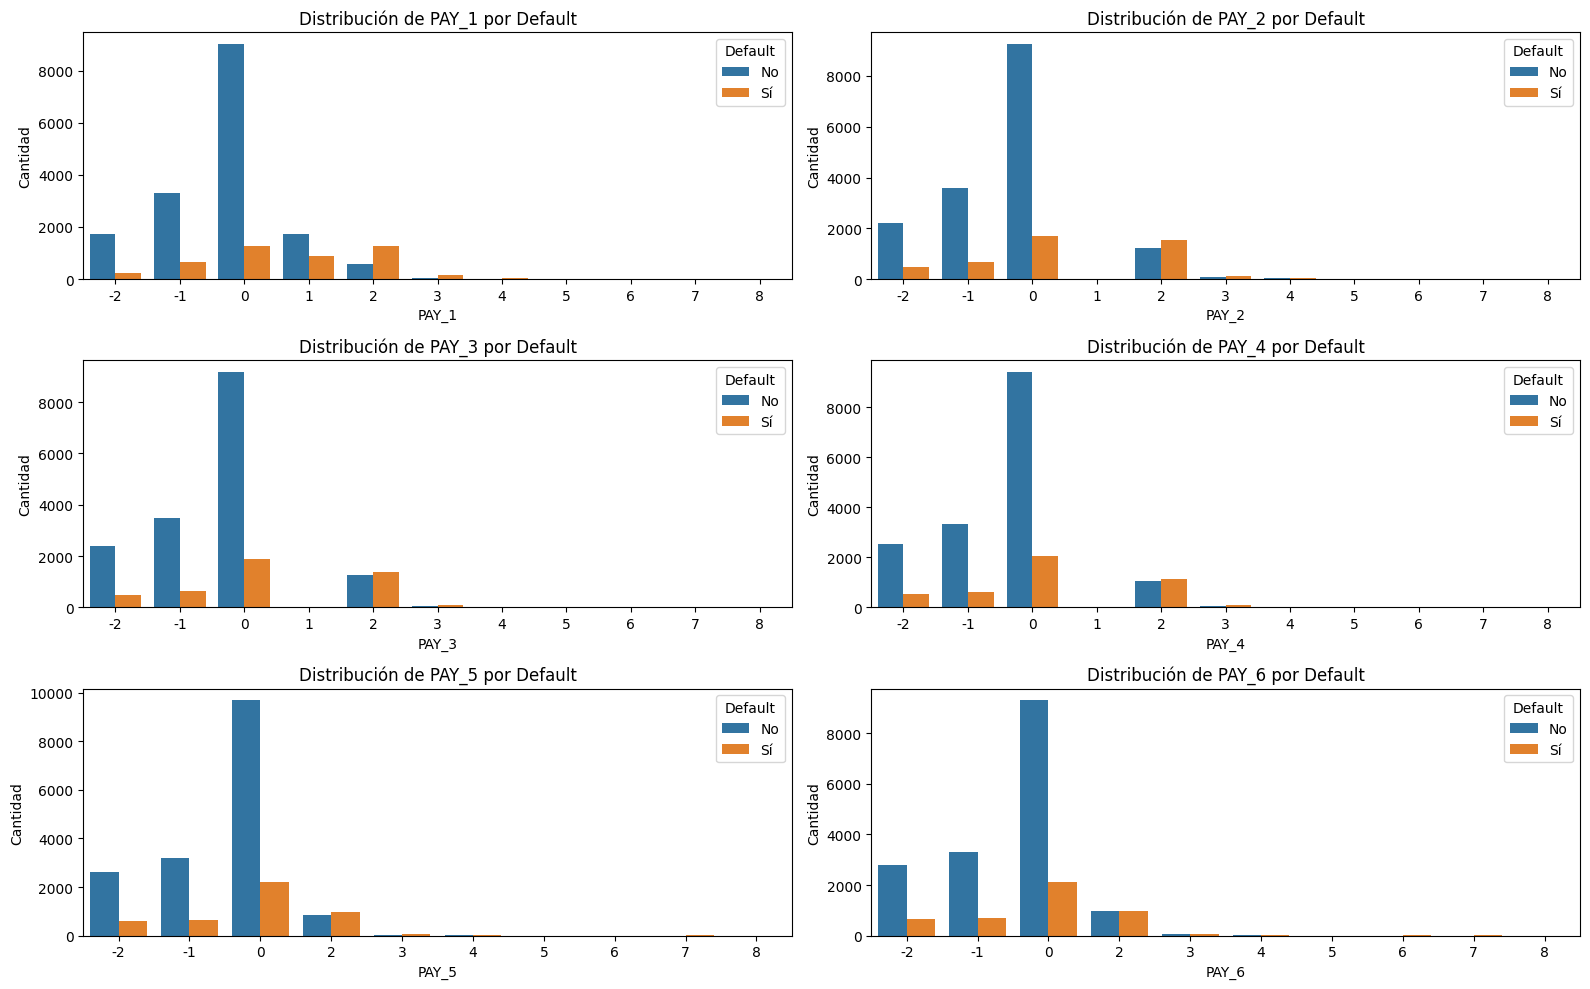

In [10]:
pay_vars = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
fig, axes = plt.subplots(3, 2, figsize=(16, 10))


for ax, var in zip(axes.flatten(), pay_vars):
    sns.countplot(data=df, x=var, hue='default payment next month', ax=ax)
    ax.set_title(f'Distribución de {var} por Default')
    ax.set_xlabel(var)
    ax.set_ylabel('Cantidad')
    ax.legend(title='Default', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

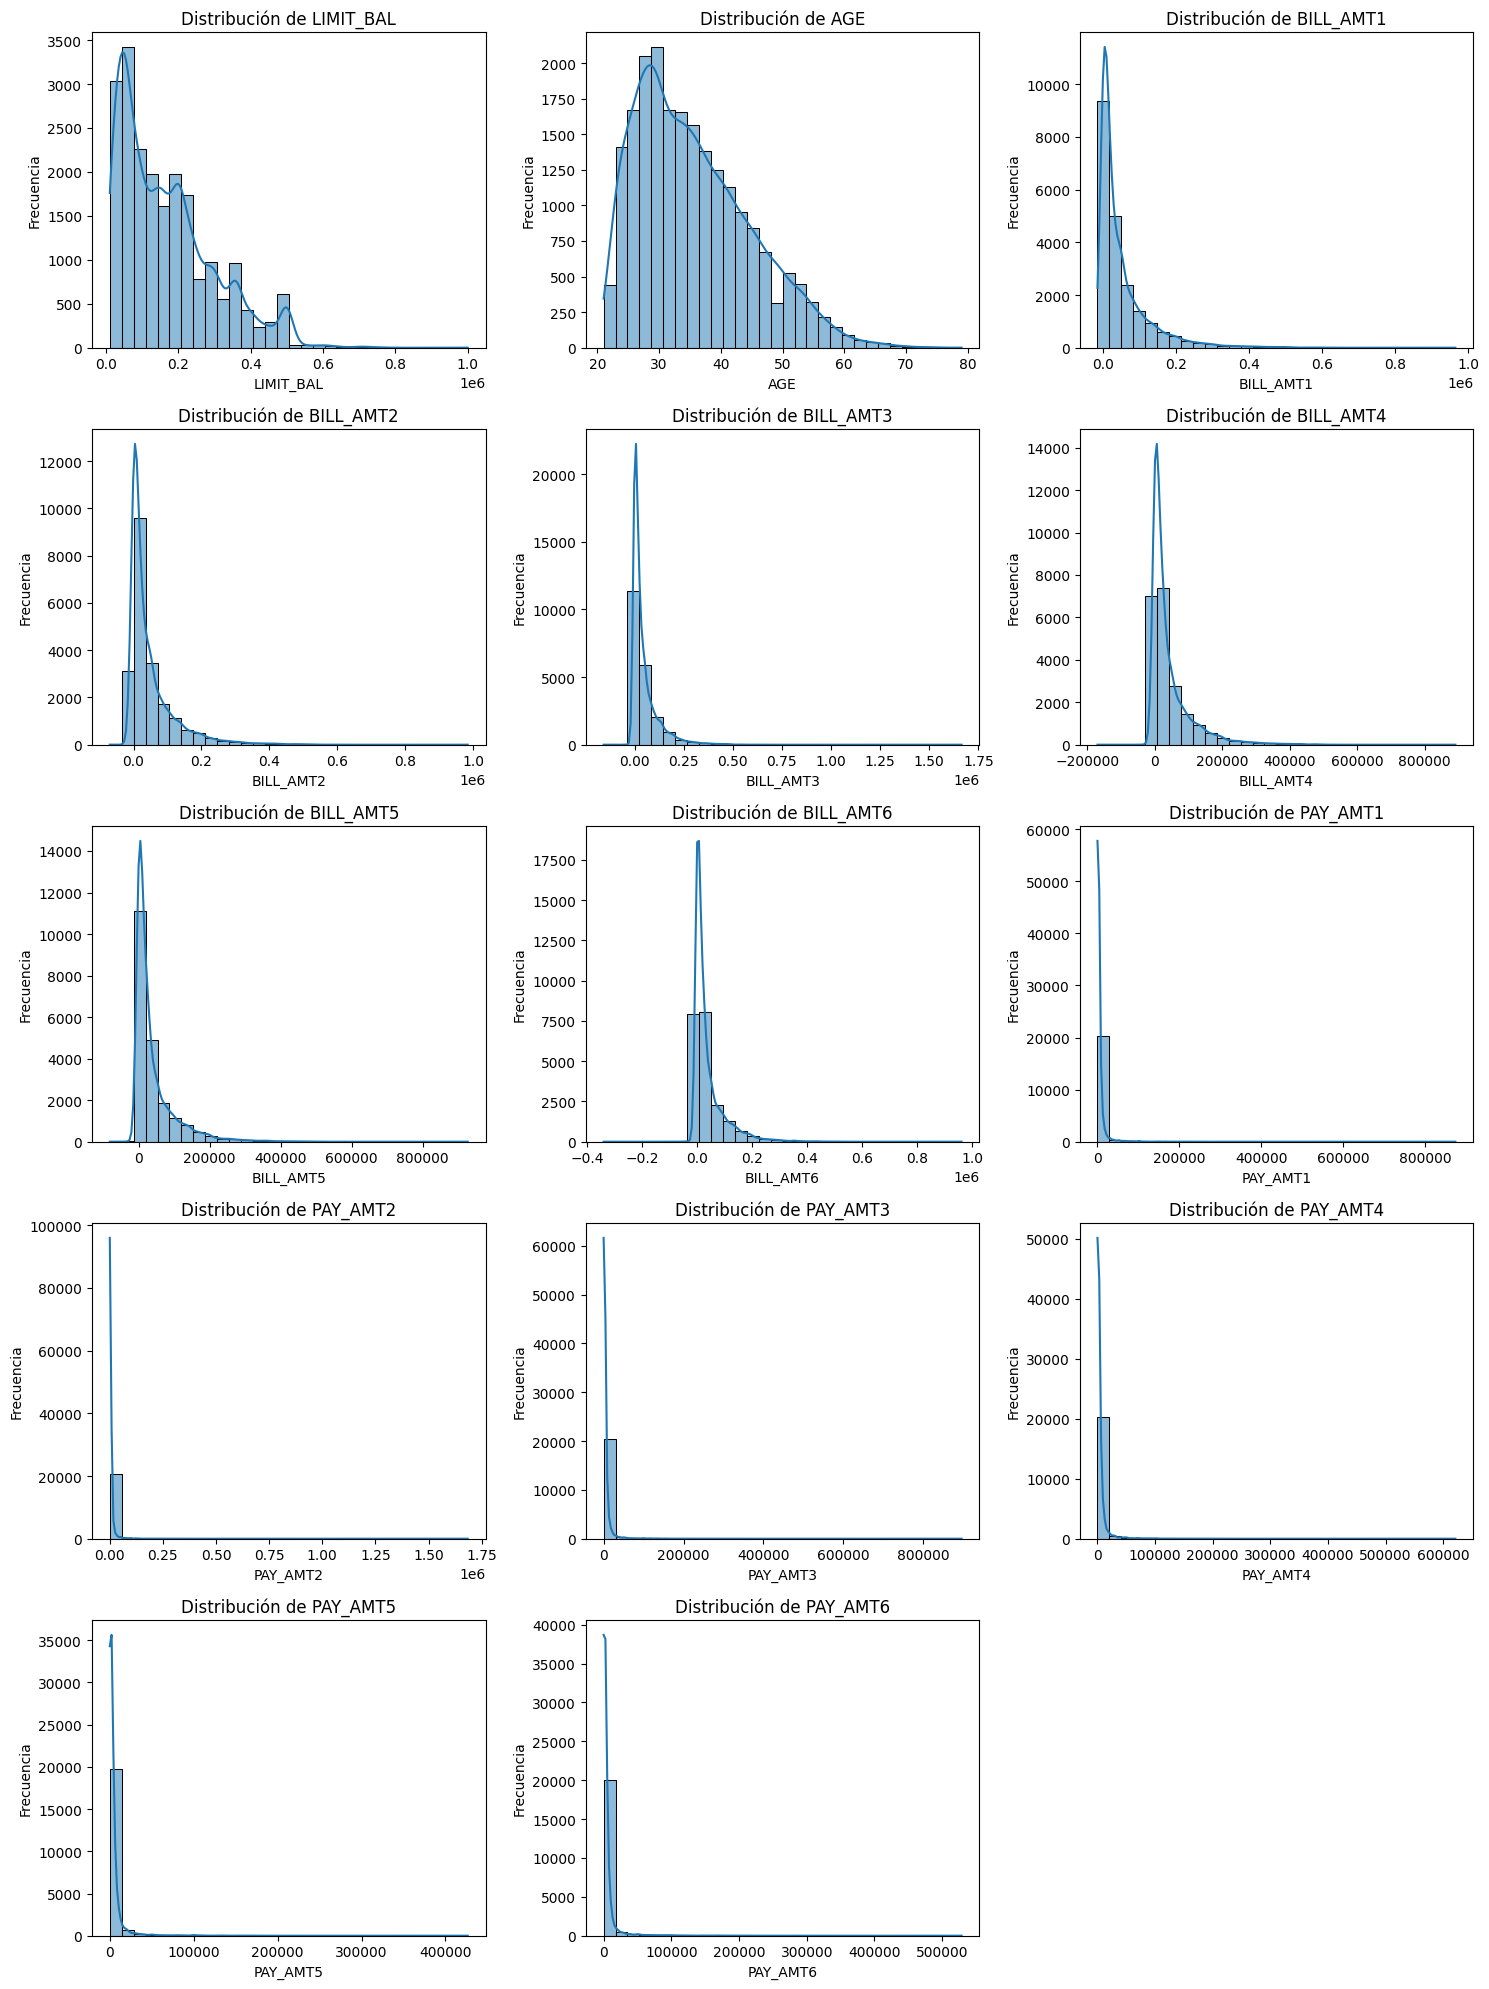

In [11]:
# Variables numérica del df
numeric_cols = numerical_features

# Tamaño de la grilla
n = len(numeric_cols)
n_cols = 3  # 3 por fila
n_rows = (n + n_cols - 1) // n_cols

# Graficar
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols):
    row, col_idx = divmod(i, n_cols)
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Si hay ejes vacíos, los eliminamos
for j in range(i+1, n_rows * n_cols):
    row, col_idx = divmod(j, n_cols)
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
def clip_outliers(df):
    """
    Recorta los valores atípicos (outliers) de las columnas numéricas de un DataFrame usando el método del rango intercuartílico (IQR).
    
    Para cada columna numérica:
        - Calcula el primer cuartil (Q1) y el tercer cuartil (Q3).
        - Calcula el rango intercuartílico (IQR = Q3 - Q1).
        - Define los límites inferior y superior como Q1 - 1.5*IQR y Q3 + 1.5*IQR.
        - Recorta los valores fuera de estos límites.
    
    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
    
    Retorna:
        pd.DataFrame: DataFrame con los valores recortados en las columnas numéricas.
    """
    for col in df[numerical_features]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [13]:
clip_df = clip_outliers(df)


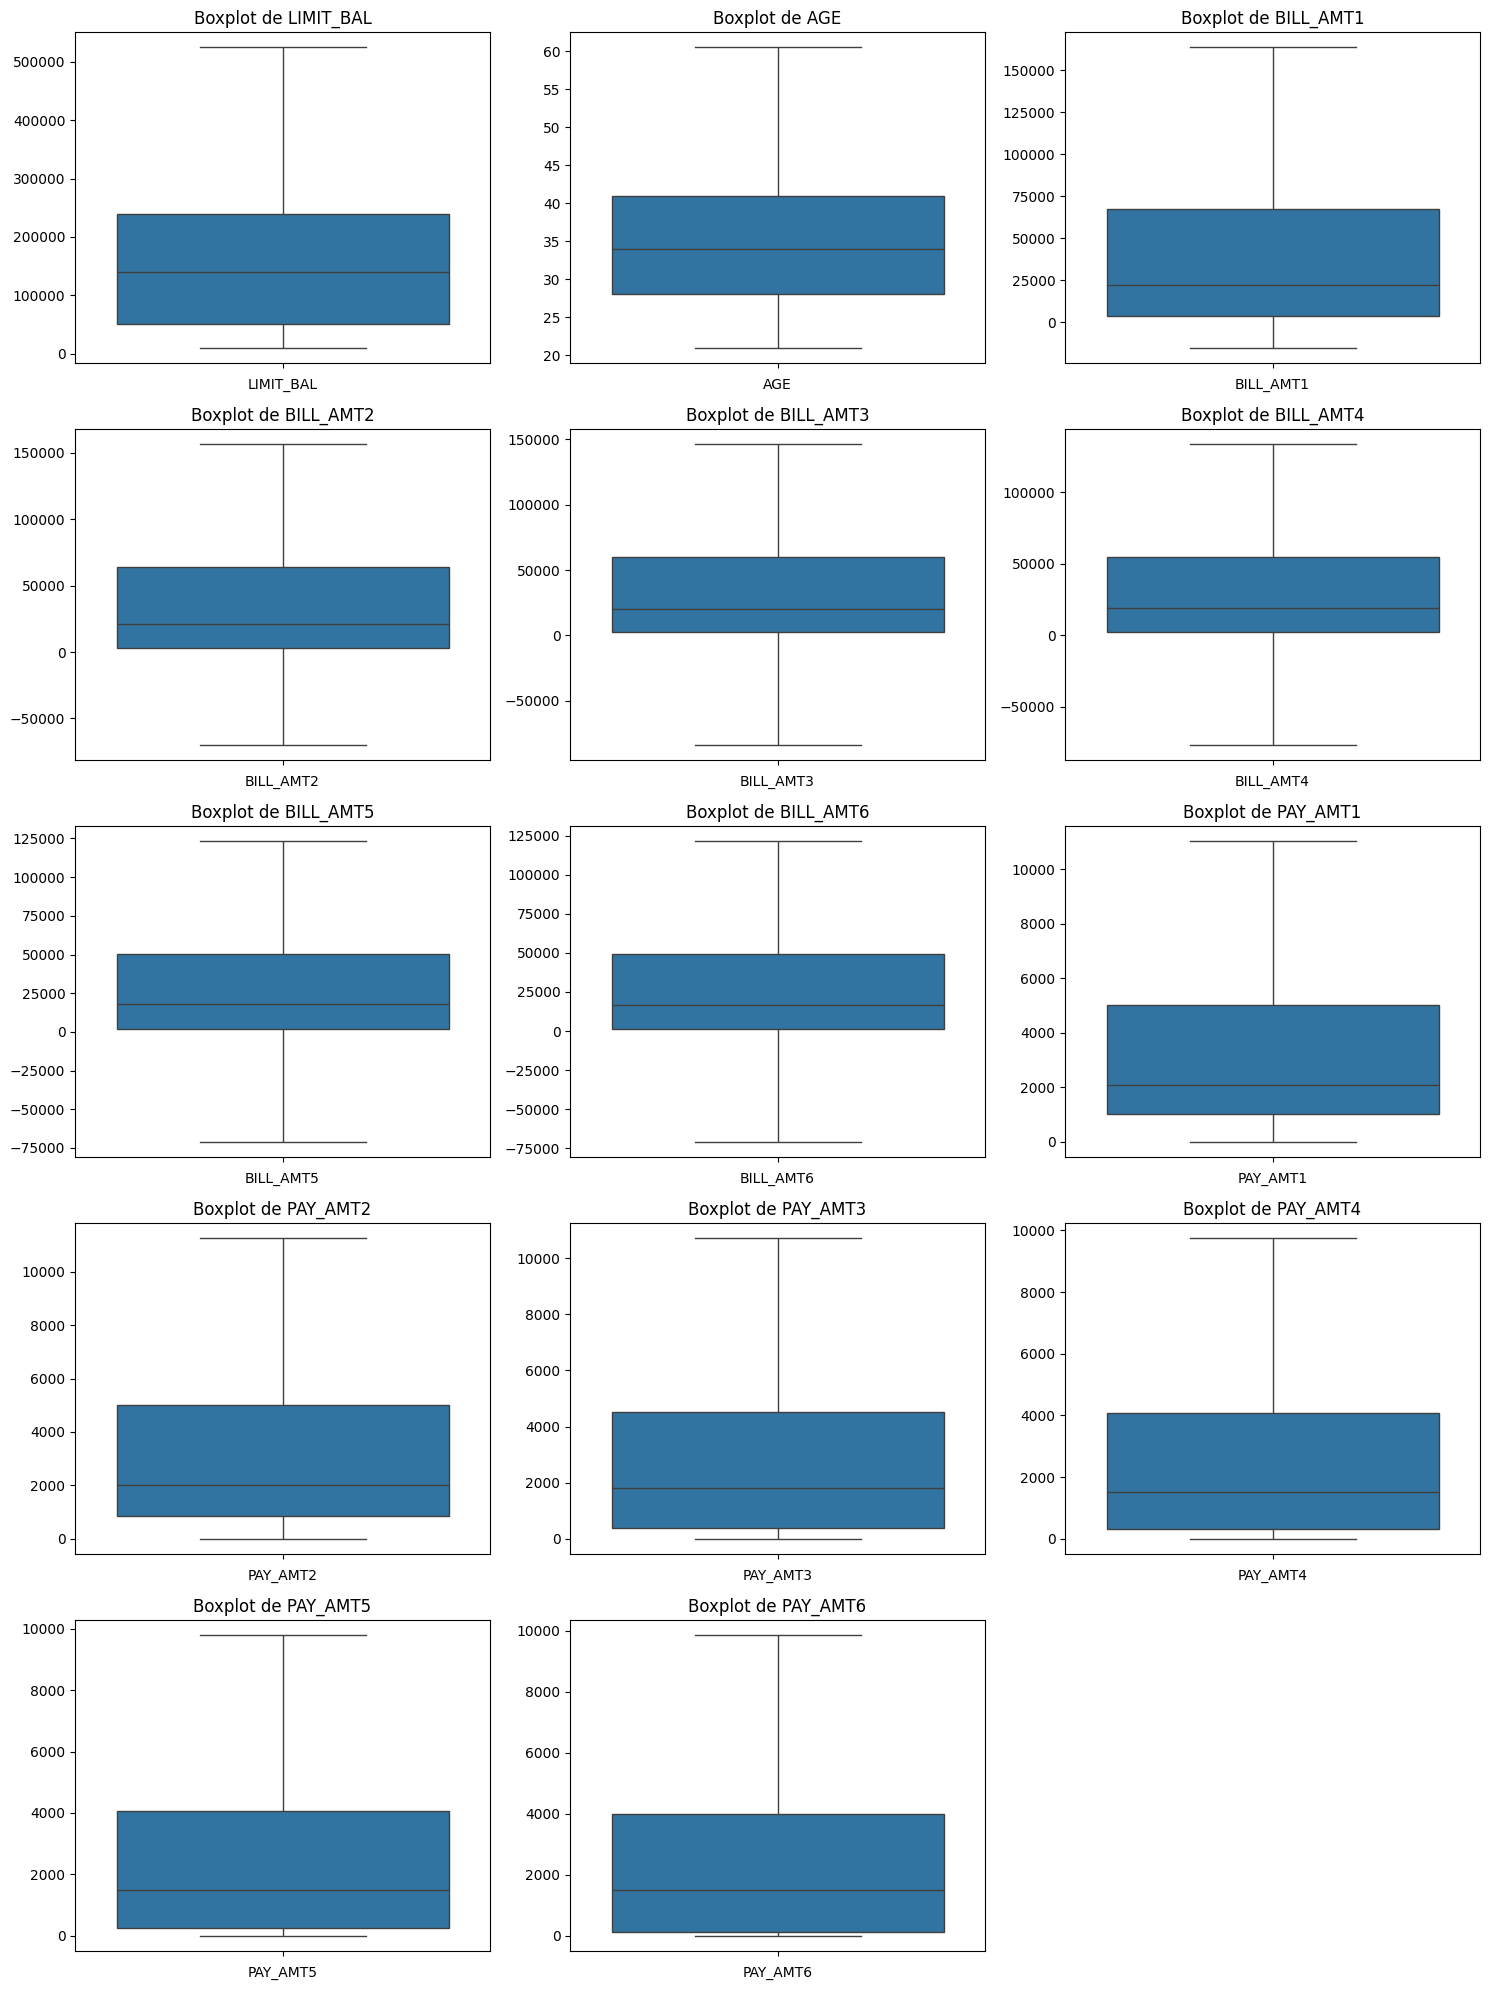

In [14]:
# Tamaño de la grilla
n = len(numeric_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols):
    row, col_idx = divmod(i, n_cols)
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    sns.boxplot(data=clip_df, y=col, ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel('')
    ax.set_xlabel(col)

# Desactivar ejes vacíos
for j in range(i+1, n_rows * n_cols):
    row, col_idx = divmod(j, n_cols)
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    ax.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# EDUCATION: agrupar 4, 5, 6 como "otros" (valor 4)
clip_df['EDUCATION'] = clip_df['EDUCATION'].replace([0, 4, 5, 6], 4)

# MARRIAGE: agrupar 0 como "otros" (valor 3)
clip_df['MARRIAGE'] = clip_df['MARRIAGE'].replace(0, 3)



In [16]:
#Creamos variables nuevas para analisis

pay_cols = [f'PAY_{i}' for i in [1, 2, 3, 4, 5, 6]]
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
clip_df['TOTAL_PAYMENTS'] = clip_df[pay_amt_cols].sum(axis=1)
clip_df['AVG_BILL_AMT'] = clip_df[bill_cols].mean(axis=1)
clip_df['AVG_PAY_AMT'] = clip_df[pay_amt_cols].mean(axis=1)
clip_df['TOTAL_BILL'] = clip_df[bill_cols].sum(axis=1)




In [17]:
#Creación de variables para mejora del modelo

clip_df['IS_CONSISTENT_PAYER'] = (clip_df[pay_cols] <= 0).all(axis=1).astype(int)
clip_df['AVG_PAY_DELAY'] = clip_df[pay_cols].mean(axis=1)
clip_df['MAX_PAY_DELAY'] = clip_df[pay_cols].max(axis=1)
clip_df['NUM_LATE_PAYMENTS'] = (clip_df[pay_cols] > 0).sum(axis=1)
clip_df['PAYMENT_TREND'] = clip_df['PAY_AMT1'] - clip_df['PAY_AMT6']



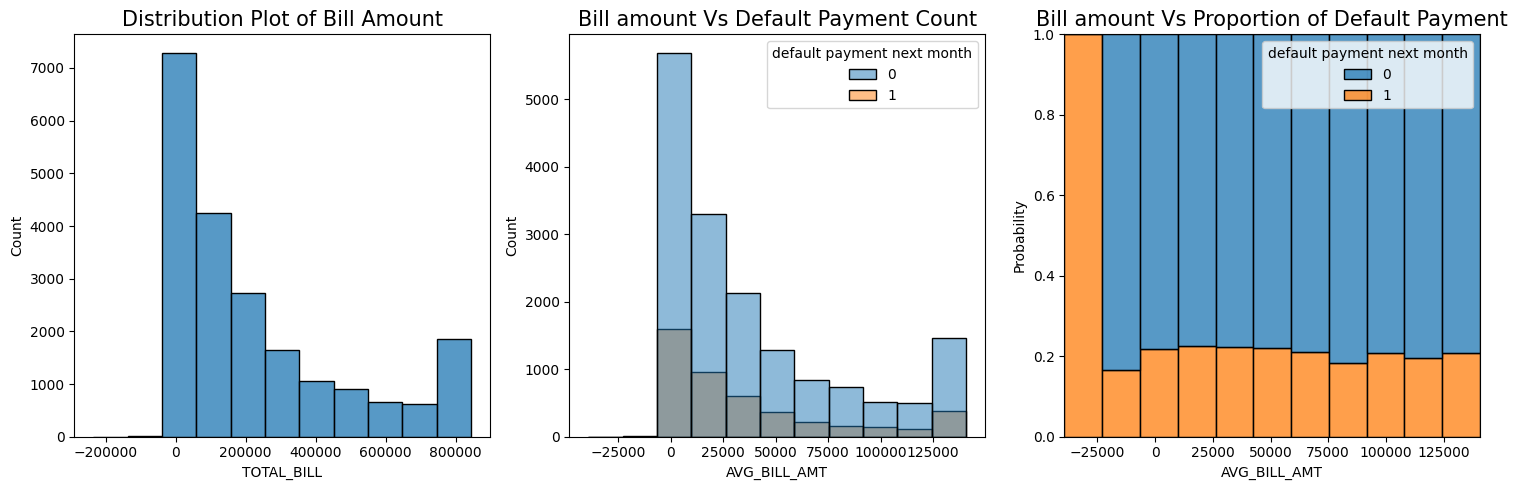

In [18]:

fig,ax = plt.subplots(1,3, figsize=(15,5))


hist = sns.histplot(clip_df['TOTAL_BILL'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Bill Amount', size=15)


hist = sns.histplot(data=clip_df, x='AVG_BILL_AMT', hue='default payment next month',bins=11, ax=ax[1])
hist.set_title('Bill amount Vs Default Payment Count', size=15)


hist = sns.histplot(data=clip_df, x='AVG_BILL_AMT', hue='default payment next month', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Bill amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()

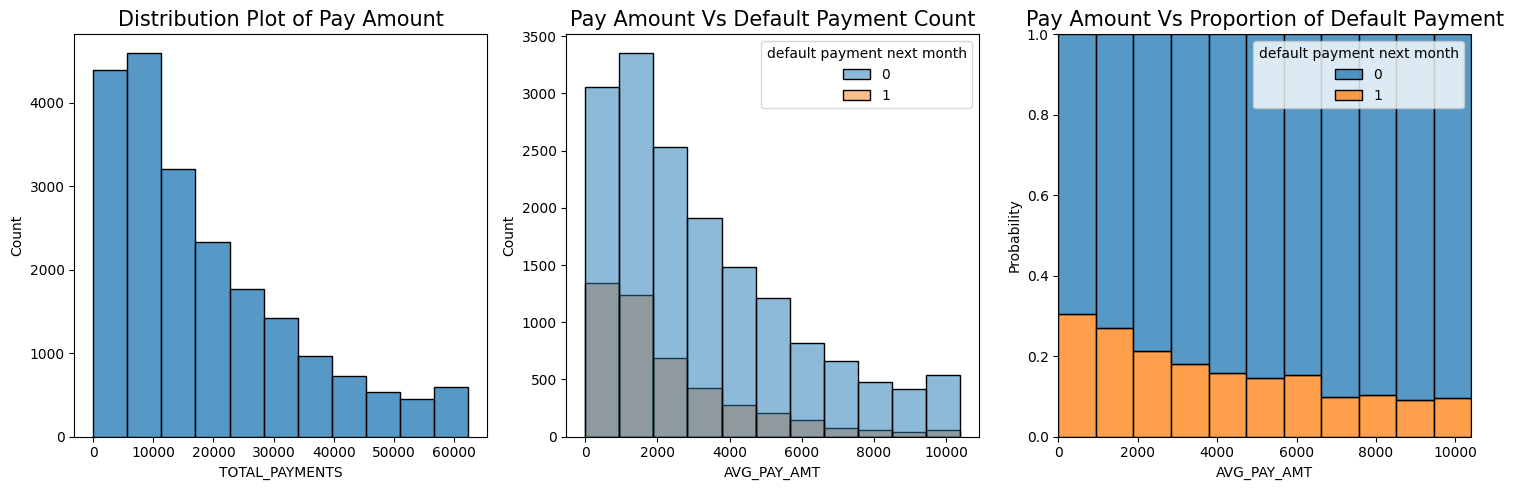

In [19]:
fig,ax = plt.subplots(1,3, figsize=(15,5))


hist = sns.histplot(clip_df['TOTAL_PAYMENTS'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Pay Amount', size=15)


hist = sns.histplot(data=clip_df, x='AVG_PAY_AMT', hue='default payment next month',bins=11, ax=ax[1])
hist.set_title('Pay Amount Vs Default Payment Count', size=15)


hist = sns.histplot(data=clip_df, x='AVG_PAY_AMT', hue='default payment next month', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Pay Amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()

In [20]:
df_feature = clip_df.copy()


In [21]:
df_feature[categorical_features] = df_feature[categorical_features].astype(str)


df_feature.dtypes

ID                              int64
LIMIT_BAL                       int64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                           float64
PAY_1                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month     object
TOTAL_PAYMENTS                float64
AVG_BILL_AMT

<Axes: >

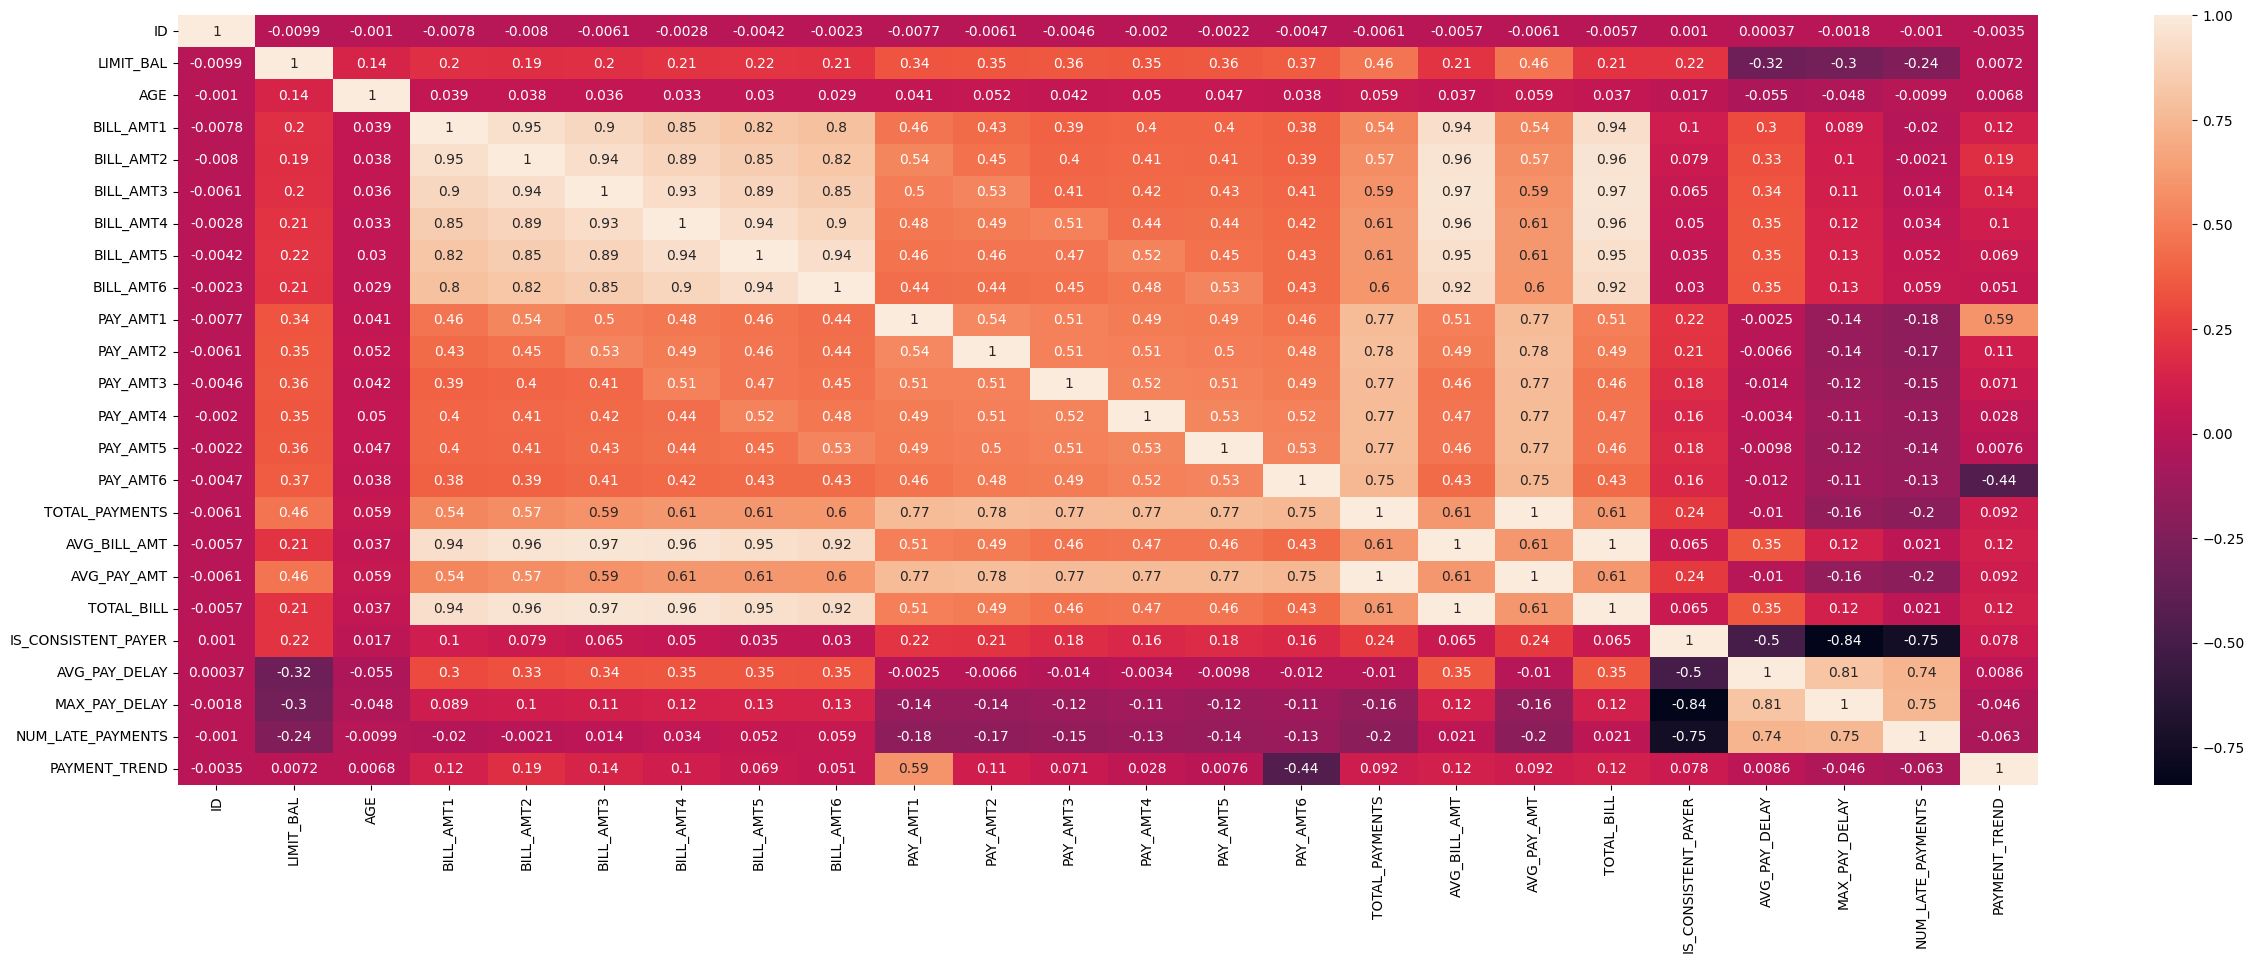

In [22]:
numeric_cols_f = df_feature.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(30,10))
sns.heatmap(df_feature[numeric_cols_f].corr(), annot=True) 

In [23]:

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if np.abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [24]:
correlation(df_feature[numeric_cols_f], 0.75)

{'AVG_BILL_AMT',
 'AVG_PAY_AMT',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'MAX_PAY_DELAY',
 'NUM_LATE_PAYMENTS',
 'TOTAL_BILL',
 'TOTAL_PAYMENTS'}

In [25]:
df_feature.drop('ID',axis = 1, inplace = True)


La alta correlación de variables puede ser redundante, y en este caso lo es, por ello, solo nos quedaremos con el BILL_AMT1, que es el más reciente

In [26]:

df_feature.drop([
'AVG_BILL_AMT','AVG_PAY_AMT','BILL_AMT2','BILL_AMT3',
 'BILL_AMT4','BILL_AMT5','BILL_AMT6','TOTAL_BILL','TOTAL_PAYMENTS'
  ], axis=1, inplace=True)



<Axes: >

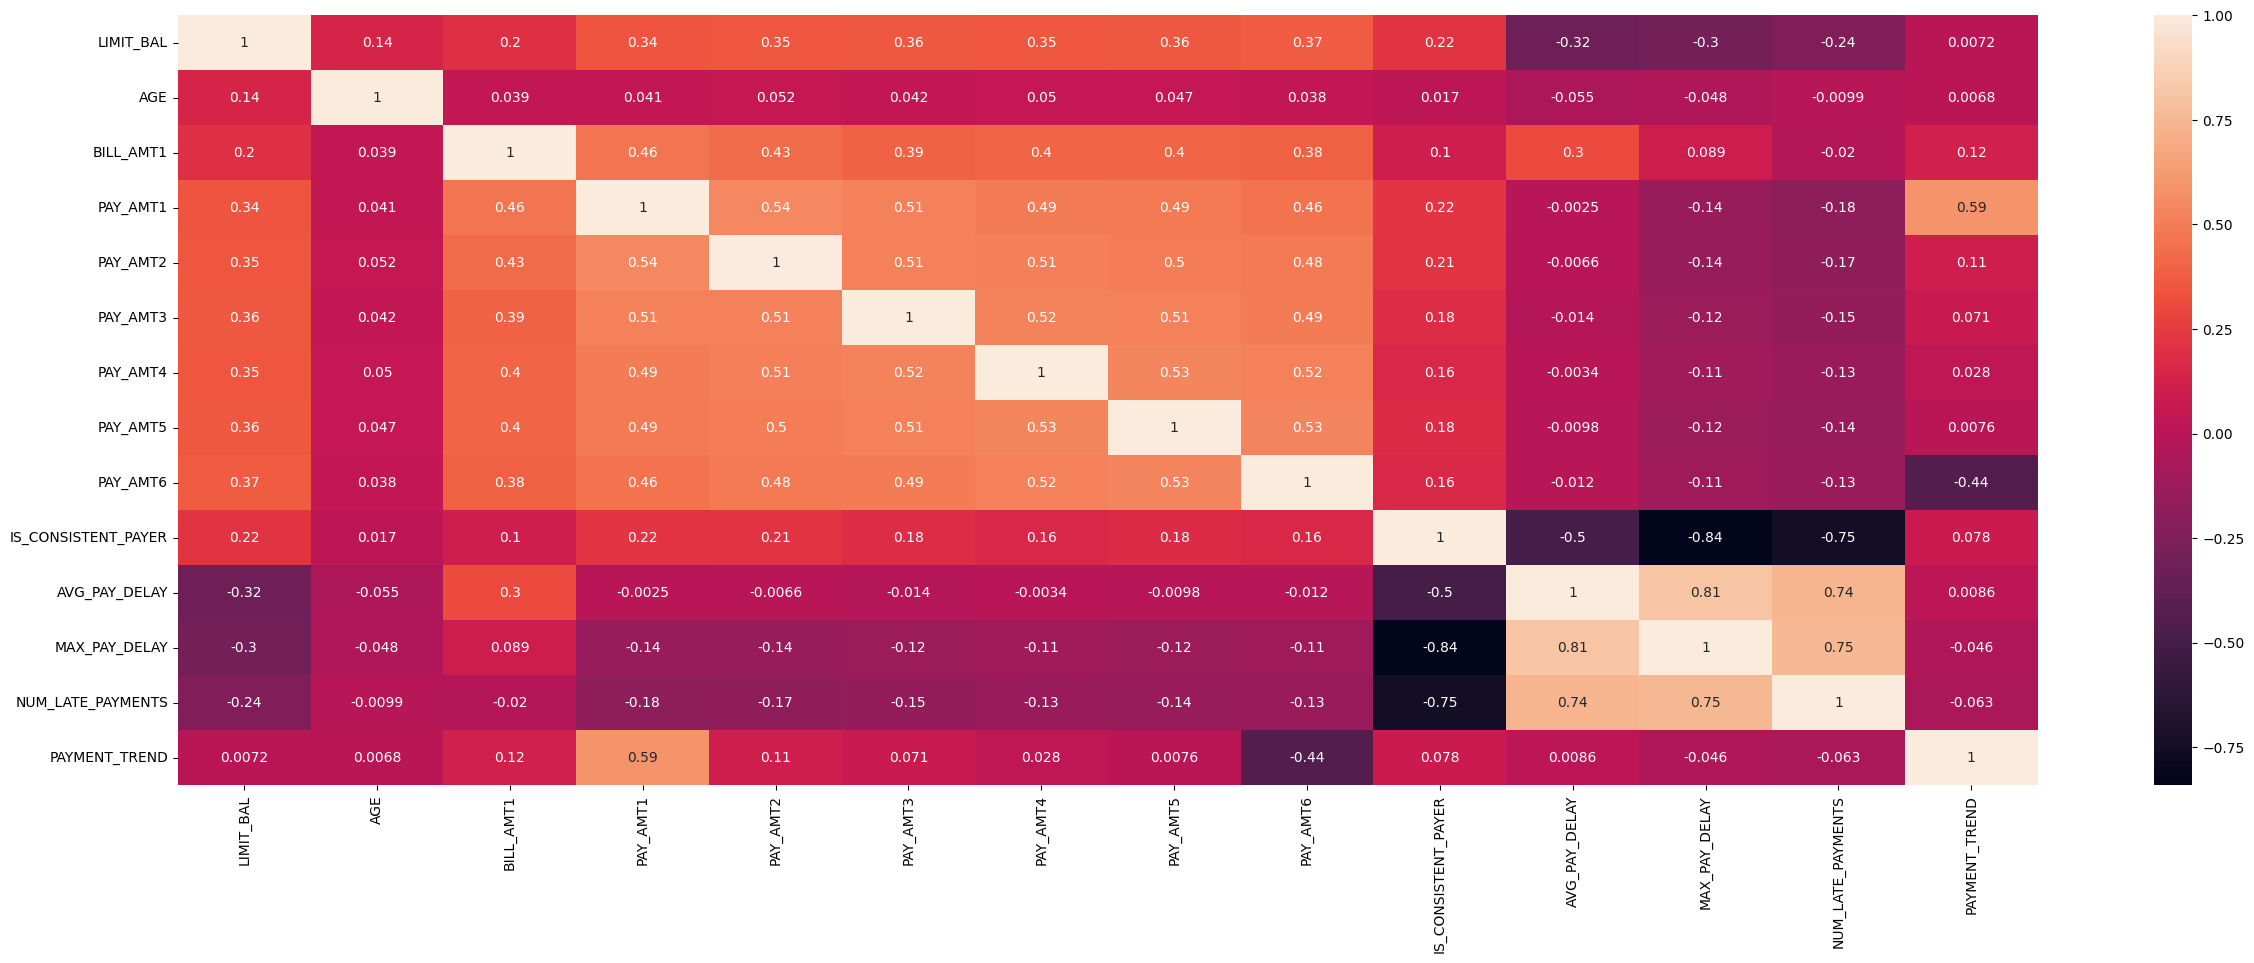

In [27]:
numeric_cols_f = df_feature.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(30,10))
sns.heatmap(df_feature[numeric_cols_f].corr(), annot=True) 

In [28]:
df_feature["default payment next month"].value_counts()

default payment next month
0    16445
1     4555
Name: count, dtype: int64

### Entrenamiento del modelo

# Balanceo con smote

In [29]:
X = df_feature.drop(columns='default payment next month')     
y = df_feature['default payment next month']                  

print(f'Before Handling Imbalanced class {Counter(y)}')

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(X, y)
y= y.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f'After Handling Imbalanced class {Counter(y)}')


Before Handling Imbalanced class Counter({'0': 16445, '1': 4555})
After Handling Imbalanced class Counter({0: 16445, 1: 16445})


In [30]:

model_result_1 = []

def predict_cv_2(ml_model, model_name, X, y, cv=5, scoring='roc_auc', param_grid=None):
    '''
    Evalúa un modelo con validación cruzada, opcionalmente ajustado con GridSearchCV.
    Muestra matriz de confusión y curva ROC personalizada.
    Devuelve el mejor modelo ajustado.
    '''
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # GridSearchCV
    if param_grid:
        grid = GridSearchCV(ml_model, param_grid, cv=skf, scoring=scoring, n_jobs=-1)
        grid.fit(X, y)
        ml_model = grid.best_estimator_
        print(f"Best parameters from GridSearch for {model_name}:")
        print(grid.best_params_)
        print('-'*80)

    # Cross-validation
    y_pred = cross_val_predict(ml_model, X, y, cv=skf)
    y_prob = cross_val_predict(ml_model, X, y, cv=skf, method="predict_proba")[:, 1]

    # Métricas
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)

    print(f'Model: {model_name}')
    print(f'Accuracy:     {acc:.3f}')
    print(f'Precision:    {prec:.3f}')
    print(f'Recall:       {rec:.3f}')
    print(f'F1-score:     {f1:.3f}')
    print(f'ROC AUC:      {roc_auc:.3f}')
    print('-'*80)

    print('Classification Report:')
    print(classification_report(y, y_pred))
    print('-'*80)

    # Matriz de confusión
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Curva ROC mejorada
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {model_name}', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Mostrar algunas predicciones
    d = pd.DataFrame({'y_actual': y, 'y_pred': y_pred})
    print('Predictions sample:')
    print(d.head(10).T)
    print('-'*80)

    # Guardar métricas
    model_result_1.append({
        'model': model_name,
        'cv_accuracy': acc,
        'cv_precision': prec,
        'cv_recall': rec,
        'cv_f1': f1,
        'cv_roc_auc': roc_auc
    })

    return ml_model





Model: LogisticRegression
Accuracy:     0.772
Precision:    0.780
Recall:       0.756
F1-score:     0.768
ROC AUC:      0.829
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     16445
           1       0.78      0.76      0.77     16445

    accuracy                           0.77     32890
   macro avg       0.77      0.77      0.77     32890
weighted avg       0.77      0.77      0.77     32890

--------------------------------------------------------------------------------


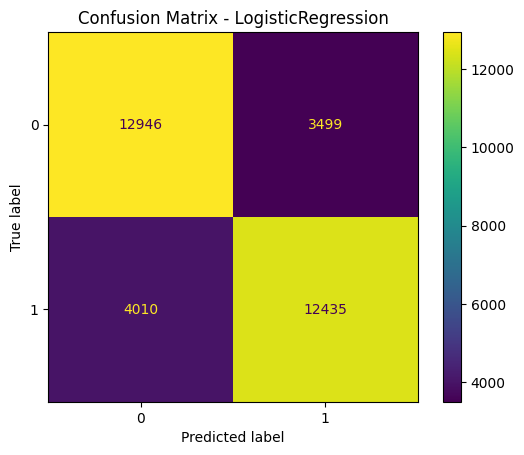

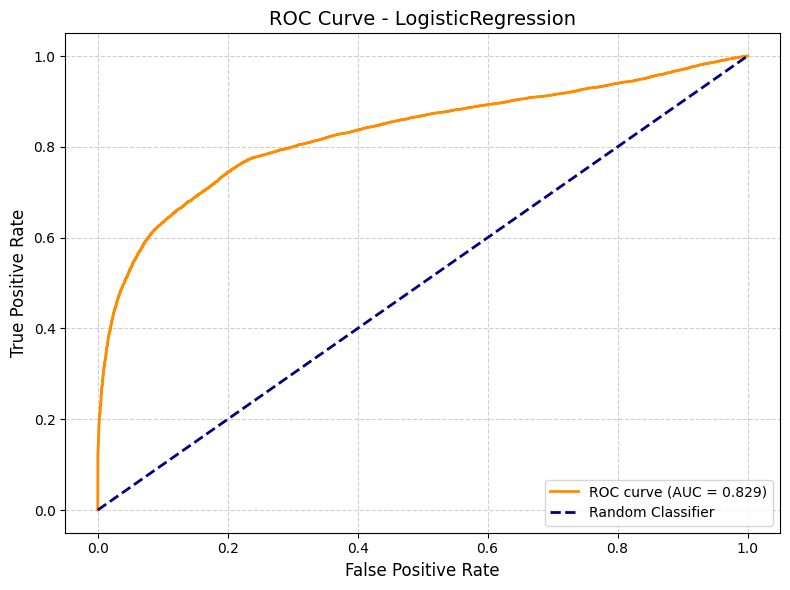

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  0  0  0  1  1  1  0
--------------------------------------------------------------------------------


LogisticRegression()

In [31]:
predict_cv_2(LogisticRegression(), 'LogisticRegression', X, y)

Model: KNN
Accuracy:     0.846
Precision:    0.812
Recall:       0.900
F1-score:     0.854
ROC AUC:      0.846
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     16445
           1       0.81      0.90      0.85     16445

    accuracy                           0.85     32890
   macro avg       0.85      0.85      0.85     32890
weighted avg       0.85      0.85      0.85     32890

--------------------------------------------------------------------------------


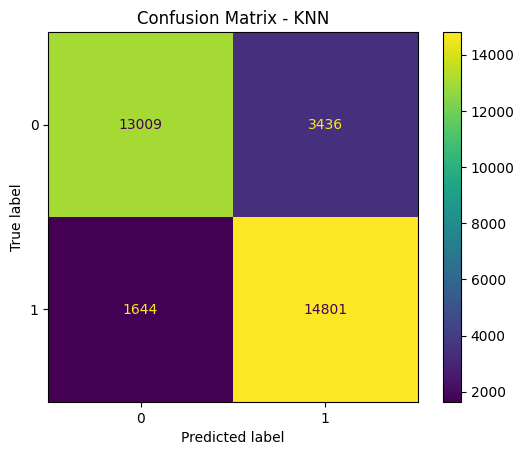

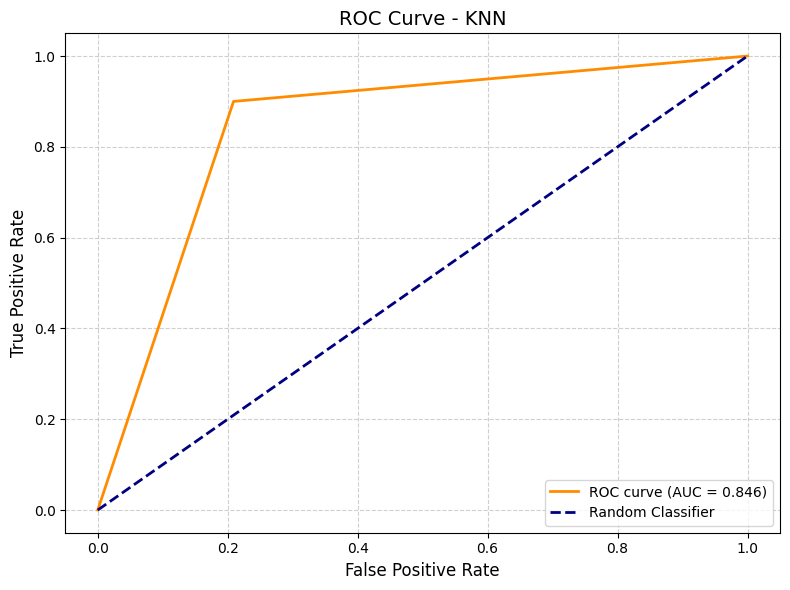

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    1  1  1  1  1  1  0  0  1  0
--------------------------------------------------------------------------------


KNeighborsClassifier(n_neighbors=1)

In [32]:
predict_cv_2(KNeighborsClassifier(n_neighbors=1), 'KNN', X, y)

Model: SVM
Accuracy:     0.818
Precision:    0.856
Recall:       0.764
F1-score:     0.807
ROC AUC:      0.901
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     16445
           1       0.86      0.76      0.81     16445

    accuracy                           0.82     32890
   macro avg       0.82      0.82      0.82     32890
weighted avg       0.82      0.82      0.82     32890

--------------------------------------------------------------------------------


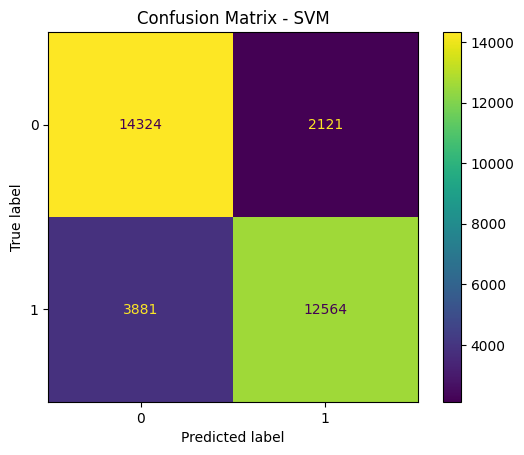

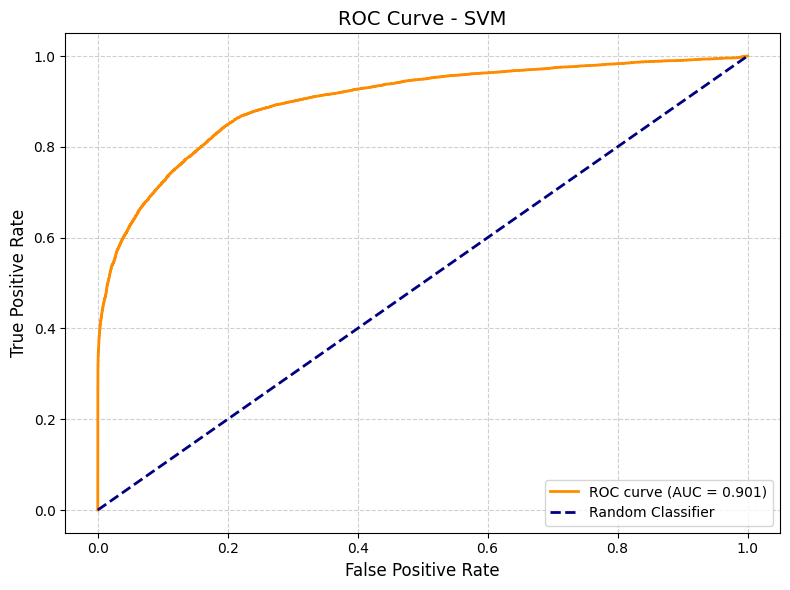

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  1  0  0  1  0  1  0
--------------------------------------------------------------------------------


SVC(probability=True)

In [33]:
predict_cv_2(SVC(probability=True), 'SVM', X, y)

Model: DecisionTree
Accuracy:     0.815
Precision:    0.808
Recall:       0.826
F1-score:     0.817
ROC AUC:      0.815
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     16445
           1       0.81      0.83      0.82     16445

    accuracy                           0.81     32890
   macro avg       0.81      0.81      0.81     32890
weighted avg       0.81      0.81      0.81     32890

--------------------------------------------------------------------------------


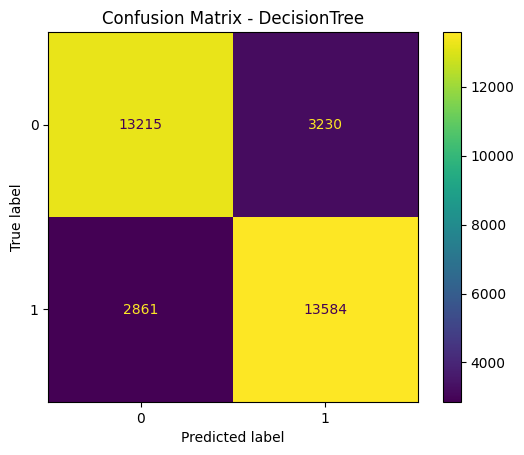

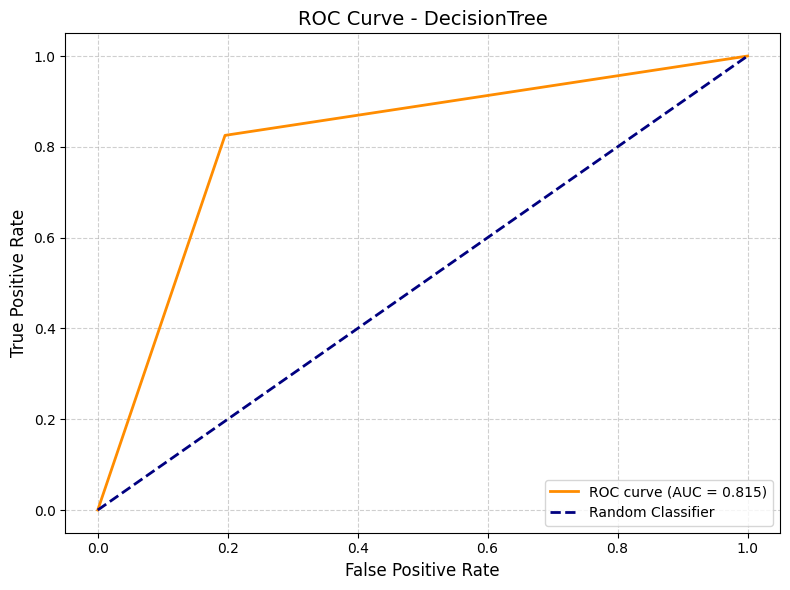

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  0  1  0  1  0  1  0
--------------------------------------------------------------------------------


DecisionTreeClassifier()

In [34]:
predict_cv_2(DecisionTreeClassifier(), 'DecisionTree', X, y)

Best parameters from GridSearch for Logistic Regression + GridSearch:
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
--------------------------------------------------------------------------------
Model: Logistic Regression + GridSearch
Accuracy:     0.774
Precision:    0.777
Recall:       0.769
F1-score:     0.773
ROC AUC:      0.829
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     16445
           1       0.78      0.77      0.77     16445

    accuracy                           0.77     32890
   macro avg       0.77      0.77      0.77     32890
weighted avg       0.77      0.77      0.77     32890

--------------------------------------------------------------------------------


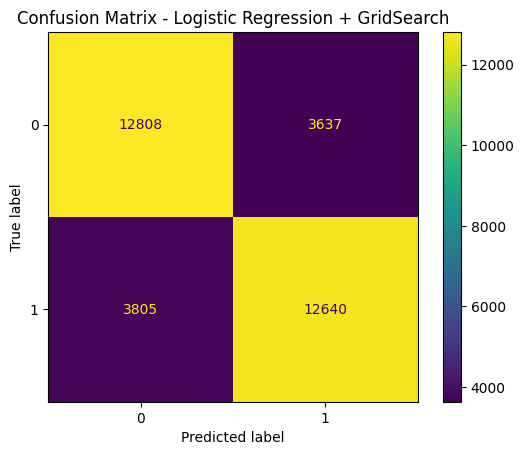

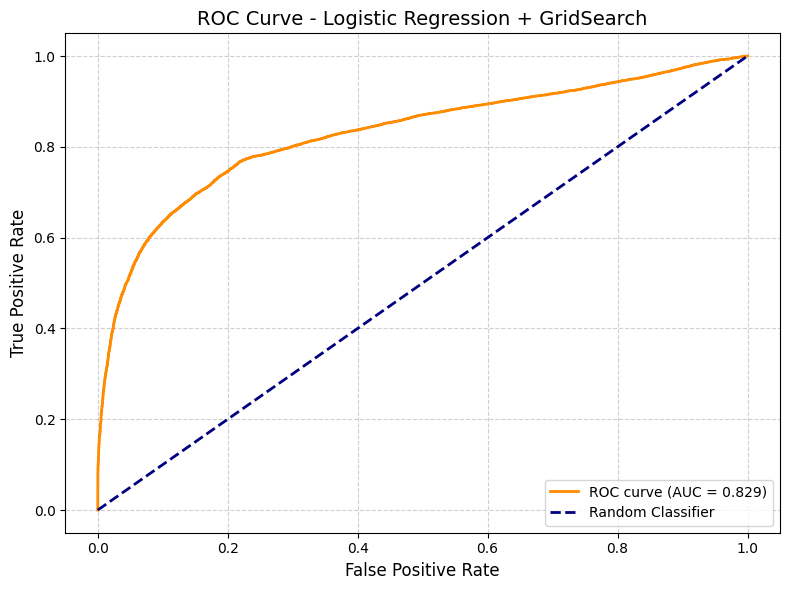

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  1  0  0  1  1  1  0
--------------------------------------------------------------------------------


In [35]:
param_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

best_logreg = predict_cv_2(LogisticRegression(max_iter=1000), "Logistic Regression + GridSearch", X, y, param_grid=param_logreg)


Best parameters from GridSearch for KNN + GridSearch:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
--------------------------------------------------------------------------------
Model: KNN + GridSearch
Accuracy:     0.857
Precision:    0.852
Recall:       0.863
F1-score:     0.858
ROC AUC:      0.928
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     16445
           1       0.85      0.86      0.86     16445

    accuracy                           0.86     32890
   macro avg       0.86      0.86      0.86     32890
weighted avg       0.86      0.86      0.86     32890

--------------------------------------------------------------------------------


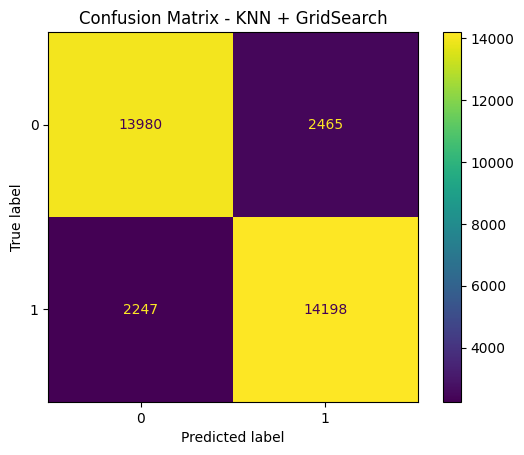

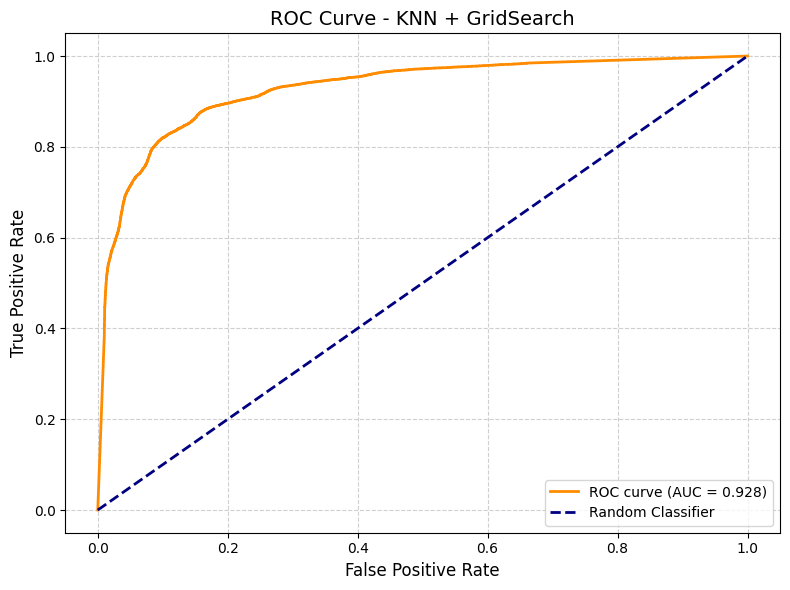

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    1  1  0  1  0  0  1  1  1  0
--------------------------------------------------------------------------------


In [36]:
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

best_knn = predict_cv_2(KNeighborsClassifier(), "KNN + GridSearch", X, y, param_grid=param_knn)


Best parameters from GridSearch for Decision Tree + GridSearch:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
--------------------------------------------------------------------------------
Model: Decision Tree + GridSearch
Accuracy:     0.845
Precision:    0.890
Recall:       0.788
F1-score:     0.836
ROC AUC:      0.909
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     16445
           1       0.89      0.79      0.84     16445

    accuracy                           0.85     32890
   macro avg       0.85      0.85      0.84     32890
weighted avg       0.85      0.85      0.84     32890

--------------------------------------------------------------------------------


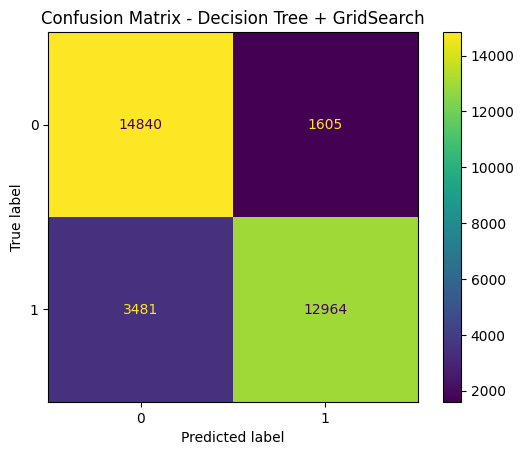

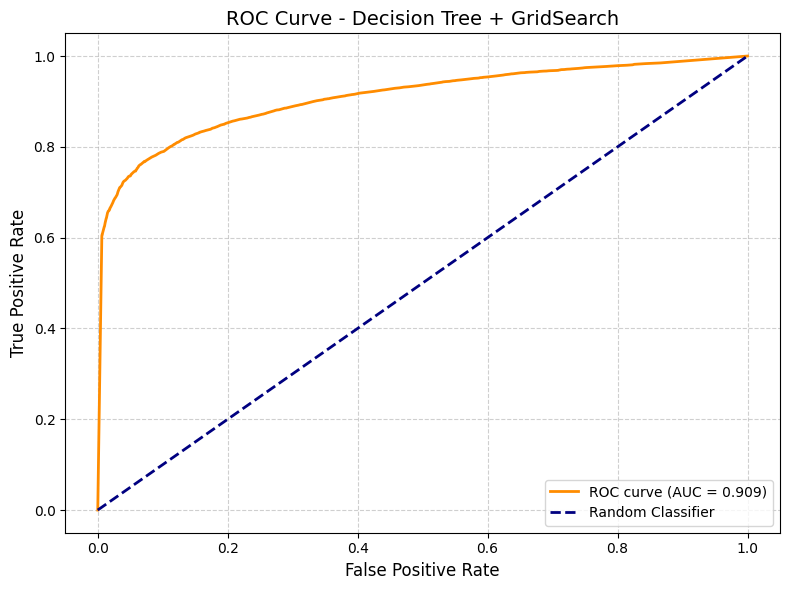

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  1  0  0  1  0  1  0
--------------------------------------------------------------------------------


In [37]:
param_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

best_tree = predict_cv_2(DecisionTreeClassifier(random_state=42), "Decision Tree + GridSearch", X, y, param_grid=param_tree)


Model: LDA
Accuracy:     0.770
Precision:    0.771
Recall:       0.769
F1-score:     0.770
ROC AUC:      0.829
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     16445
           1       0.77      0.77      0.77     16445

    accuracy                           0.77     32890
   macro avg       0.77      0.77      0.77     32890
weighted avg       0.77      0.77      0.77     32890

--------------------------------------------------------------------------------


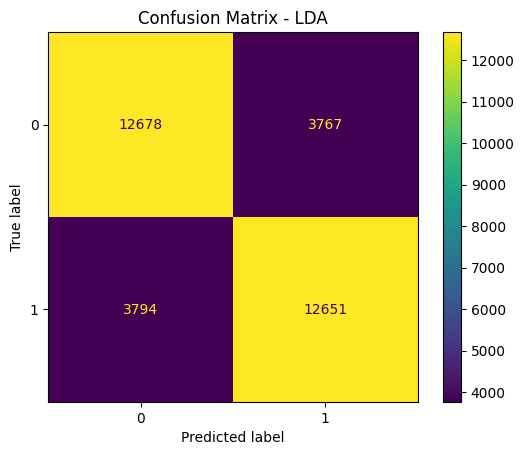

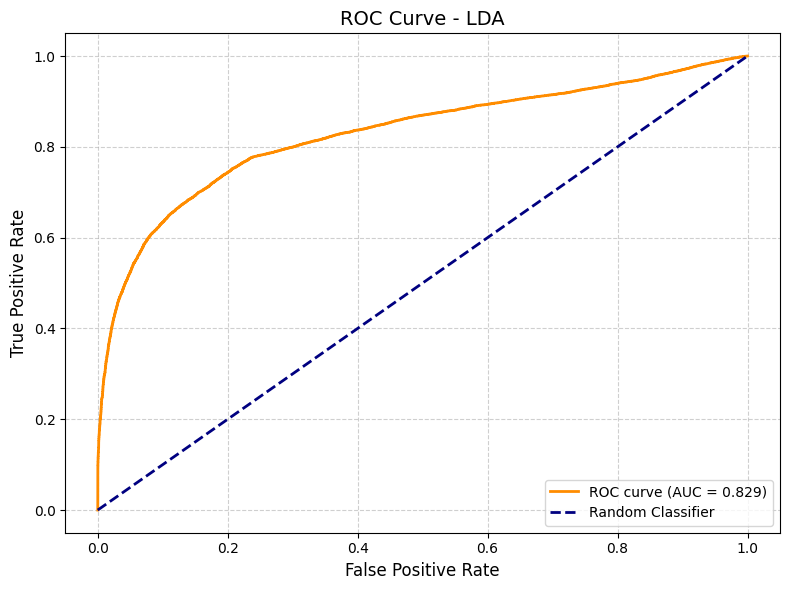

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  1  0  0  1  1  1  0
--------------------------------------------------------------------------------


LinearDiscriminantAnalysis()

In [38]:

predict_cv_2(LinearDiscriminantAnalysis(), 'LDA', X, y)


Best parameters from GridSearch for KNN + PCA:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance', 'pca__n_components': 18}
--------------------------------------------------------------------------------
Model: KNN + PCA
Accuracy:     0.838
Precision:    0.812
Recall:       0.879
F1-score:     0.844
ROC AUC:      0.914
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     16445
           1       0.81      0.88      0.84     16445

    accuracy                           0.84     32890
   macro avg       0.84      0.84      0.84     32890
weighted avg       0.84      0.84      0.84     32890

--------------------------------------------------------------------------------


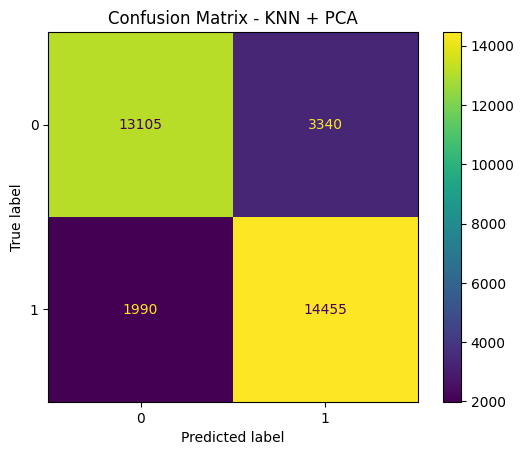

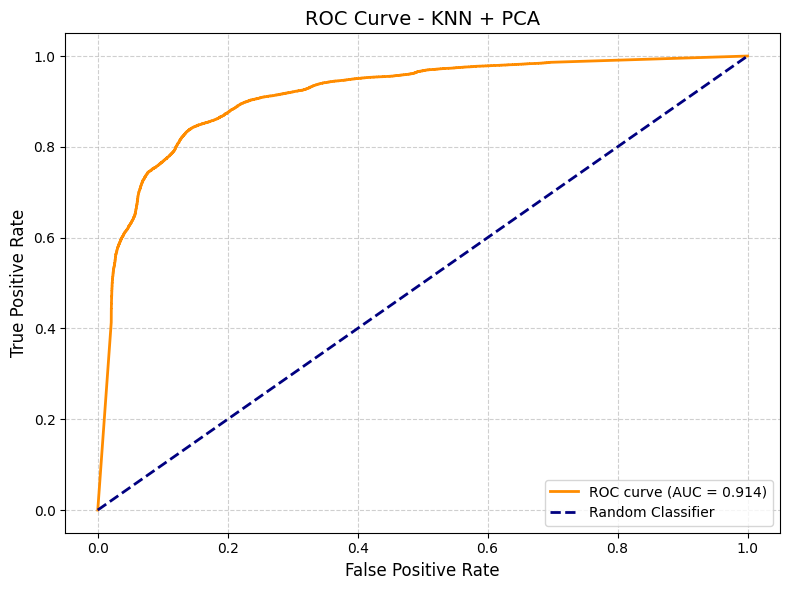

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    1  1  0  1  1  0  1  0  1  1
--------------------------------------------------------------------------------


In [39]:

# 🔄 Pipeline con PCA + KNN
pipe_pca_knn = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# 📊 GridSearch ajustado con nombres correctos de los pasos
param_knn = {
    'pca__n_components': [5, 10, 15, 18],  # puedes ajustar según tus columnas
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# ✅ Ejecutar evaluación con tu función
best_pca_knn_model = predict_cv_2(
    ml_model=pipe_pca_knn,
    model_name='KNN + PCA',
    X=X,
    y=y,
    cv=5,
    scoring='roc_auc',
    param_grid=param_knn
)



Best parameters from GridSearch for Decision Tree + PCA:
{'pca__n_components': 12, 'tree__criterion': 'entropy', 'tree__max_depth': 9, 'tree__min_samples_split': 10}
--------------------------------------------------------------------------------
Model: Decision Tree + PCA
Accuracy:     0.762
Precision:    0.769
Recall:       0.748
F1-score:     0.758
ROC AUC:      0.824
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77     16445
           1       0.77      0.75      0.76     16445

    accuracy                           0.76     32890
   macro avg       0.76      0.76      0.76     32890
weighted avg       0.76      0.76      0.76     32890

--------------------------------------------------------------------------------


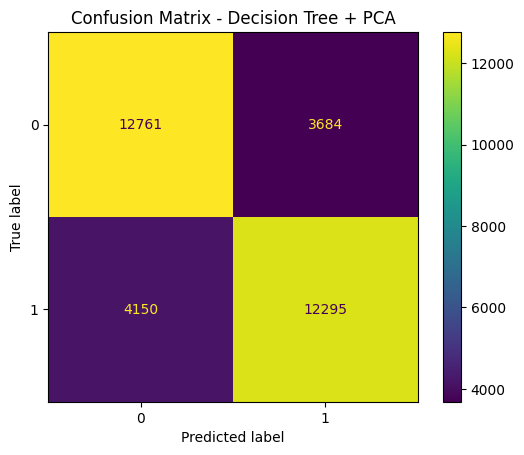

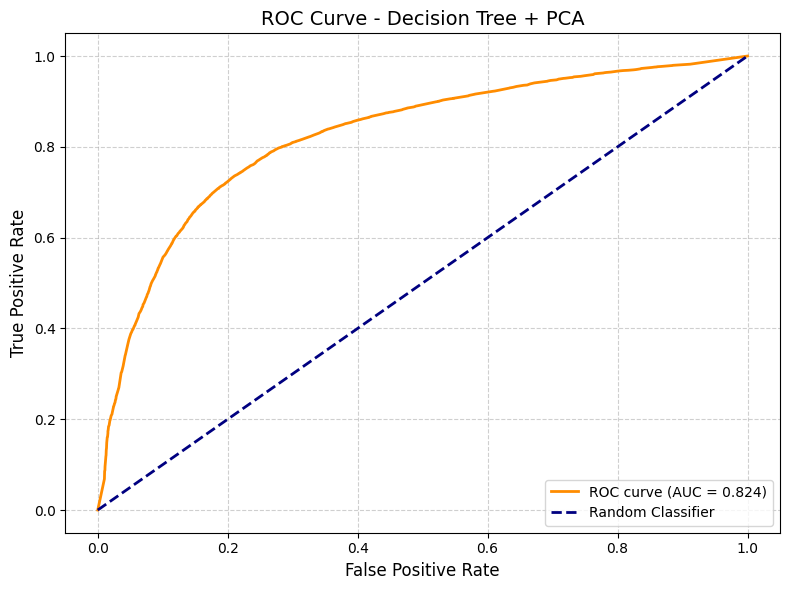

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  1  0  0  1  1  1  0
--------------------------------------------------------------------------------


In [40]:

#  Pipeline PCA + Decision Tree
pipe_pca_tree = Pipeline([
    ('pca', PCA()),
    ('tree', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# 🔍 Hiperparámetros para grid search
param_tree = {
    'pca__n_components': [5, 8, 10, 12],
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split': [2, 5, 10]
}

# ✅ Ejecutamos la evaluación con validación cruzada
best_pca_tree_model = predict_cv_2(
    ml_model=pipe_pca_tree,
    model_name='Decision Tree + PCA',
    X=X,
    y=y,
    cv=5,
    scoring='roc_auc',
    param_grid=param_tree
)


Model: SVM + PCA
Accuracy:     0.801
Precision:    0.809
Recall:       0.788
F1-score:     0.798
ROC AUC:      0.881
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     16445
           1       0.81      0.79      0.80     16445

    accuracy                           0.80     32890
   macro avg       0.80      0.80      0.80     32890
weighted avg       0.80      0.80      0.80     32890

--------------------------------------------------------------------------------


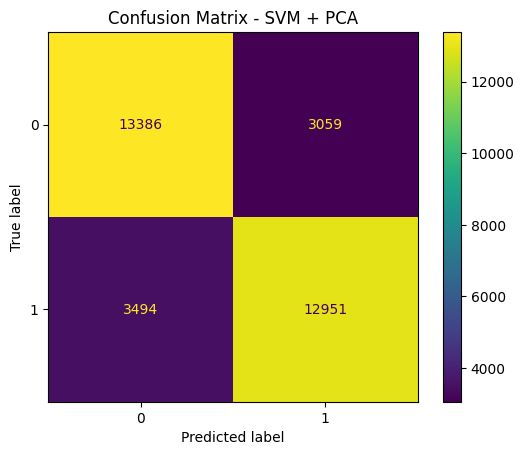

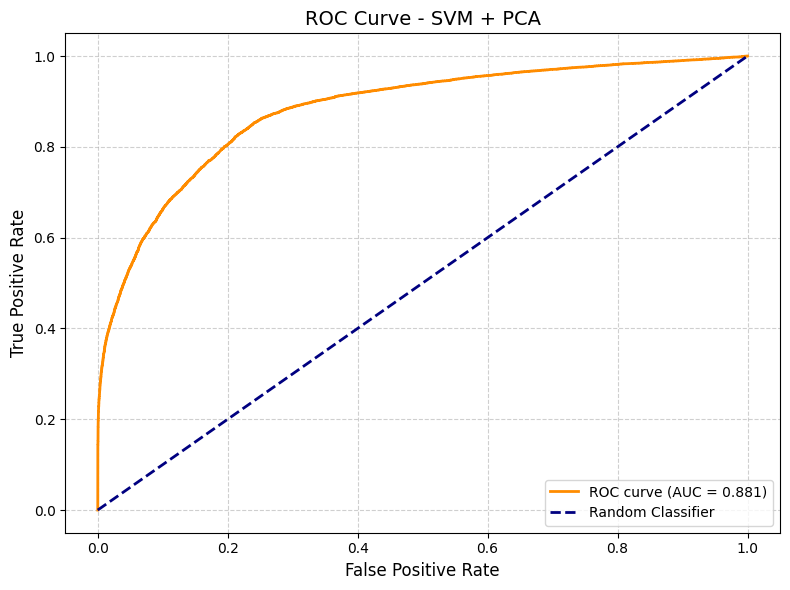

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  0  0  1  0  0  1  0  1  0
--------------------------------------------------------------------------------


Pipeline(steps=[('pca', PCA(n_components=12)),
                ('svc', SVC(C=1, probability=True))])

In [41]:


# Para usar PCA en el pipeline de predict_cv_2, debes crear un Pipeline que incluya PCA y el clasificador SVM.

pipe_svm_pca = Pipeline([
    ('pca', PCA(n_components=12)),
    ('svc', SVC(kernel='rbf', C=1, probability=True))
])

predict_cv_2(
    pipe_svm_pca,
    model_name='SVM + PCA',
    X=X, y=y
)

Model: SVM + PCA + Grid (Best Params)
Accuracy:     0.849
Precision:    0.887
Recall:       0.799
F1-score:     0.841
ROC AUC:      0.916
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     16445
           1       0.89      0.80      0.84     16445

    accuracy                           0.85     32890
   macro avg       0.85      0.85      0.85     32890
weighted avg       0.85      0.85      0.85     32890

--------------------------------------------------------------------------------


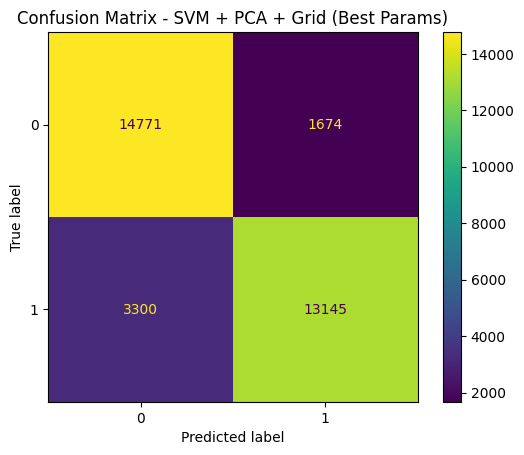

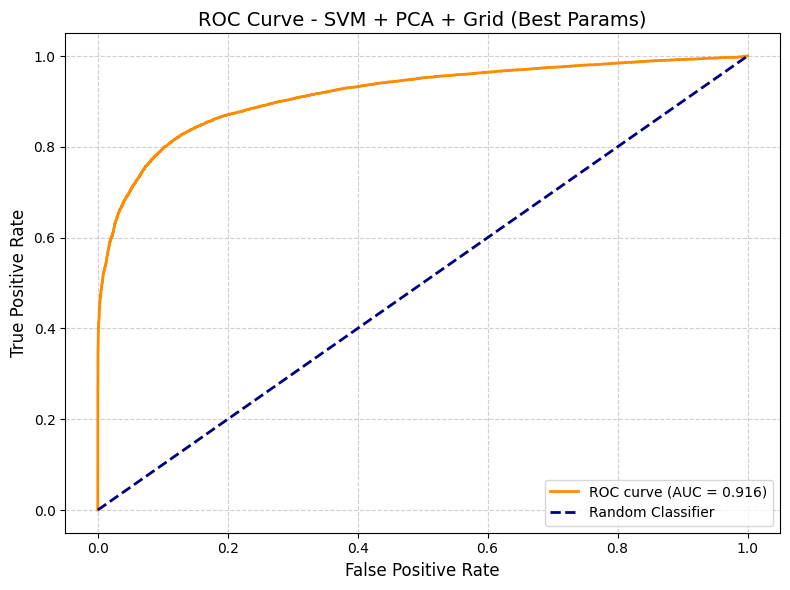

Predictions sample:
          0  1  2  3  4  5  6  7  8  9
y_actual  0  0  0  0  0  0  0  0  0  0
y_pred    0  1  0  1  0  0  1  0  1  0
--------------------------------------------------------------------------------


In [42]:
best_svm_pca_grid = predict_cv_2(
    SVC(C=10, kernel='rbf', probability=True),
    model_name='SVM + PCA + Grid (Best Params)',
    X=X, y=y
)

In [43]:
model_result_1 = pd.DataFrame(model_result_1)


### Resultados

In [51]:
round(model_result_1.sort_values("model"),3)

,model,cv_accuracy,cv_precision,cv_recall,cv_f1,cv_roc_auc
6,Decision Tree + GridSearch,0.845,0.890,0.788,0.836,0.909
9,Decision Tree + PCA,0.762,0.769,0.748,0.758,0.824
3,DecisionTree,0.815,0.808,0.826,0.817,0.815
1,KNN,0.846,0.812,0.900,0.854,0.846
5,KNN + GridSearch,0.857,0.852,0.863,0.858,0.928
8,KNN + PCA,0.838,0.812,0.879,0.844,0.914
7,LDA,0.770,0.771,0.769,0.770,0.829
4,Logistic Regression + GridSearch,0.774,0.777,0.769,0.773,0.829
0,LogisticRegression,0.772,0.780,0.756,0.768,0.829
2,SVM,0.818,0.856,0.764,0.807,0.901


Al final, tenemos modelos bastante buenos, pero con el que decidiremos quedarnos será el más alto en accuracy y roc_auc, que es KNN + GridSearch(incluso podríamos quedarnos con el knn normal si queremos el mejor recall)

### Generación de clases para el preprocesamiento de los datos y pueda ser usado solo metiendo el archivo csv

In [45]:

# 1. Outlier Clipping
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numerical_cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3',
                                'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1',
                                'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

    def fit(self, X, y=None):
        self.bounds_ = {}
        for col in self.numerical_cols:
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1
            self.bounds_[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in self.numerical_cols:
            low, high = self.bounds_[col]
            X_[col] = X_[col].clip(low, high)
        return X_

# 2. Transformaciones categóricas y features nuevas


class CustomFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
        pay_cols = [f'PAY_{i}' for i in range(1, 7)]
    

        # Limpieza de categóricas
        df['EDUCATION'] = df['EDUCATION'].replace([0, 4, 5, 6], 4)
        df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

        # Nuevas features útiles para el modelo
        df['IS_CONSISTENT_PAYER'] = (df[pay_cols] <= 0).all(axis=1).astype(int)
        df['AVG_PAY_DELAY'] = df[pay_cols].mean(axis=1)
        df['MAX_PAY_DELAY'] = df[pay_cols].max(axis=1)
        df['NUM_LATE_PAYMENTS'] = (df[pay_cols] > 0).sum(axis=1)
        df['PAYMENT_TREND'] = df['PAY_AMT1'] - df['PAY_AMT6']

        # Columnas eliminadas para evitar multicolinealidad o ruido
        drop_cols = [
            'ID', 'BILL_AMT2','BILL_AMT3',
            'BILL_AMT4','BILL_AMT5','BILL_AMT6'
        ]
        df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)
        return df



### Creación del Pipeline con el mejor modelo

In [46]:

pipeline_final = ImbPipeline(steps=[
    ('outlier_clip', OutlierClipper()),
    ('custom_features', CustomFeatures()),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan'))
])


In [47]:
X = aux.drop(columns=['ID', 'default payment next month'])
y = aux['default payment next month']

pipeline_final.fit(X, y)


Pipeline(steps=[('outlier_clip', OutlierClipper()),
                ('custom_features', CustomFeatures()),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7,
                                      weights='distance'))])

In [48]:

with open("pipeline_final.pkl", "wb") as f:
    pickle.dump(pipeline_final, f)


Nota: Para hacer uso de este pipeline, se tendrá que tener en la misma ruta el archivo .py de las clases definidas, ademas de las librerías necesarias

# Ejemplo de uso:

In [6]:
from CDD_G29_M2_P3_Kevin_Perez_Alvarez_custom_class import OutlierClipper, CustomFeatures

def predecir_y_guardar(model_path, test_csv_path, output_csv):
    # Cargar datos
    df = pd.read_csv(test_csv_path)
    ids = df['ID'] if 'ID' in df.columns else pd.Series(range(len(df)))

    # Importar clase personalizada
    from CDD_G29_M2_P3_Kevin_Perez_Alvarez_custom_class import OutlierClipper, CustomFeatures

    # Cargar modelo
    with open(model_path, 'rb') as f:
        pipeline = pickle.load(f)

    # Hacer predicciones
    y_hat = pipeline.predict_proba(df)[:, 1]

    # Guardar resultados
    resultados = pd.DataFrame({'ID': ids, 'y_hat': y_hat})
    resultados.to_csv(output_csv, index=False)
    print(f'Archivo guardado en: {output_csv}')

In [8]:
predecir_y_guardar('./CDD_G29_M2_P3_Kevin_Perez_Alvarez.pkl', './test_p3.csv', './predicciones_p3.csv')

Archivo guardado en: ./predicciones_p3.csv
